# Phase 1 Project

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sqlite3

## Import files

In [4]:
movie_budgets= pd.read_csv('Data/tn.movie_budgets.csv')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
movie_budgets.shape

(5782, 6)

# Merging SQL

In [6]:
#create connection
con = sqlite3.connect('Data/im.db')

In [7]:
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings

""", con)

movie_ratings.head(15) 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [8]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics

""", con)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
movie_akas = pd.read_sql("""
SELECT movie_id, title
FROM movie_akas
WHERE region = 'US'
Group by movie_id
""", con)

movie_akas.shape

(47433, 2)

In [10]:
#3 data frames: movie_akas, movie_basics, movie_ratings.

In [11]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47433 entries, 0 to 47432
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  47433 non-null  object
 1   title     47433 non-null  object
dtypes: object(2)
memory usage: 741.3+ KB


In [12]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
akas_basics_merge = movie_akas.merge(movie_basics, on='movie_id',
                                        how='inner')

In [15]:
akas_basics_merge

,movie_id,title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
1,tt0112502,Bigfoot,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
2,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary
3,tt0192528,Heaven & Hell,Heaven & Hell,Reverse Heaven,2018,104.0,Drama
4,tt0230212,The Final Journey,The Final Journey,The Final Journey,2010,120.0,Drama
...,...,...,...,...,...,...,...
47428,tt9837530,Monkey King Reloaded,Monkey King Reloaded,Monkey King Reloaded,2017,77.0,Adventure
47429,tt9845398,End of the Century,End of the Century,Fin de siglo,2019,84.0,Drama
47430,tt9875852,The House Elf,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy"
47431,tt9882084,Chasing Happiness,Chasing Happiness,Chasing Happiness,2019,96.0,Documentary


In [16]:
imdb_merged = akas_basics_merge.merge(movie_ratings, on='movie_id',
                                       how='left')

In [17]:
imdb_merged.shape

(47433, 9)

In [18]:
##Full SQL Data: sql_movie_akas, sql_movie_basics, sql_movie_ratings
#joining them

#sql_df_US = pd.read_sql("""
#SELECT *
#FROM 
  #  movie_akas a
   #left join movie_basics b
   #     ON a.movie_id = b.movie_id
   #     left join movie_ratings c
   #         ON b.movie_id = c.movie_id
#WHERE a.region = 'US'

#""", con)
#sql_df_US

In [19]:
#sql_df_US.shape

In [20]:
#sql_df_US.info() ##noting here lots of nulls in languge and a good numnber in the region as well. 

#  <font color='blue'>Creating Joined Data Table for All</font>

## Cleaning up data frames to properly join!
- Removing unnecessary columns: language, types, attributes
- Cleaning up date columns for proper joins
- Removing duplicates

<font color='blue'> SQL Data Table Cleanup </font>

In [21]:
#main table from SQL is now: imdb_merged

In [22]:
#Removing language and types because mostly null values
#Removing attributes bc not a need column

#sql_df_US.drop(labels =['language','types','attributes'] , axis = 1, inplace = True) 



In [23]:
#Removing dublicates if they match in runtime minutes and primary title

#sql_df_US.drop_duplicates(subset = ['primary_title', 'runtime_minutes'], inplace= True)


In [24]:
#Checking duplicates 
#sql_df_US.loc[sql_df_US['primary_title'] == 'Aladdin']
##only one Aladdin appearing now! Yay! 

In [25]:
imdb_merged.loc[imdb_merged['primary_title'] == 'Aladdin']

,movie_id,title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
40613,tt6139732,Aladdin,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",7.4,57549.0


<font color='blue'> Movie Budgets Table Cleanup </font>

In [26]:
#renaming movie title for ease of joining

movie_budgets.rename(columns = {'movie': 'title'}, inplace = True) 

In [27]:
movie_budgets.loc[movie_budgets['title'] == 'Aladdin'] 
#see here that there are 2 aladdins but they are from 2 seperate years
#this will be an issue for when we merge if we dont merge by year + title match

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
80,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"


In [28]:
##need to merge on 2 columns i.e. start year and title column bc dupe movies diff years. 
#Can be a list to merge

In [29]:
#Creating new coumn called year that is date.time
movie_budgets['Release_Date_Time'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets['Year'] = movie_budgets['Release_Date_Time'].dt.year

In [30]:
movie_budgets['month'] = movie_budgets['Release_Date_Time'].dt.month

In [31]:
movie_budgets.info() #checking new column and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   object        
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   Release_Date_Time  5782 non-null   datetime64[ns]
 7   Year               5782 non-null   int64         
 8   month              5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 406.7+ KB


In [32]:
##taking sql_df_US, movie_budgets, movies and creating one table

movies = imdb_merged.merge(movie_budgets, left_on= ['primary_title', 'start_year'],right_on= ['title', 'Year'], how= 'inner')


In [33]:
movies.shape

(1340, 18)

In [34]:
movies

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,title_y,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,Year,month
0,tt0249516,Foodfight!,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",2012-12-31,2012,12
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",2013-12-25,2013,12
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",2014-09-19,2014,9
3,tt0369610,Jurassic World 3D,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",2015-06-12,2015,6
4,tt0376136,Hunter S. Thompson's The Rum Diary,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",2011-10-28,2011,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,Happy Death Day 2U,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",Happy Death Day 2U,"$9,000,000","$28,051,045","$64,179,495",2019-02-13,2019,2
1336,tt8266310,Blinded by the Light,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,2019-08-14,2019,8
1337,tt8364368,Crawl,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",NaN,NaN,16,"Jul 12, 2019",Crawl,"$17,000,000",$0,$0,2019-07-12,2019,7
1338,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",2018-09-21,2018,9


In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1340 non-null   object        
 1   title_x            1340 non-null   object        
 2   primary_title      1340 non-null   object        
 3   original_title     1340 non-null   object        
 4   start_year         1340 non-null   int64         
 5   runtime_minutes    1328 non-null   float64       
 6   genres             1340 non-null   object        
 7   averagerating      1318 non-null   float64       
 8   numvotes           1318 non-null   float64       
 9   id                 1340 non-null   int64         
 10  release_date       1340 non-null   object        
 11  title_y            1340 non-null   object        
 12  production_budget  1340 non-null   object        
 13  domestic_gross     1340 non-null   object        
 14  worldwid

In [36]:
movies.loc[movies['runtime_minutes'].isnull()]

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,title_y,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,Year,month
588,tt1717210,Should've Been Romeo,Should've Been Romeo,Should've Been Romeo,2012,NaN,"Comedy,Drama",6.5,44.0,96,"Dec 31, 2012",Should've Been Romeo,"$5,000,000",$0,$0,2012-12-31,2012,12
989,tt2935510,Ad Astra,Ad Astra,Ad Astra,2019,NaN,"Adventure,Drama,Mystery",NaN,NaN,9,"Sep 20, 2019",Ad Astra,"$49,800,000",$0,$0,2019-09-20,2019,9
1081,tt3532296,Joe,Joe,Joe,2014,NaN,Documentary,NaN,NaN,30,"Apr 11, 2014",Joe,"$4,000,000","$373,375","$373,375",2014-04-11,2014,4
1128,tt3864056,The Goldfinch,The Goldfinch,The Goldfinch,2019,NaN,Drama,NaN,NaN,43,"Sep 13, 2019",The Goldfinch,"$40,000,000",$0,$0,2019-09-13,2019,9
1129,tt3867652,Pancakes,Pancakes,Pancakes,2014,NaN,Drama,NaN,NaN,23,"Dec 31, 2014",Pancakes,"$400,000",$0,$0,2014-12-31,2014,12
1159,tt4192918,The Promise,The Promise,The Promise,2017,NaN,Comedy,8.8,53.0,78,"Apr 21, 2017",The Promise,"$90,000,000","$8,224,288","$10,551,417",2017-04-21,2017,4
1180,tt4463894,Shaft,Shaft,Shaft,2019,NaN,"Action,Comedy,Crime",NaN,NaN,98,"Jun 14, 2019",Shaft,"$30,000,000","$600,000","$600,000",2019-06-14,2019,6
1196,tt4607906,Romantic Schemer,Romantic Schemer,Romantic Schemer,2015,NaN,Romance,5.3,178.0,72,"Dec 31, 2015",Romantic Schemer,"$125,000",$0,$0,2015-12-31,2015,12
1248,tt5294518,Eli,Eli,Eli,2019,NaN,Horror,NaN,NaN,16,"Dec 31, 2019",Eli,"$11,000,000",$0,$0,2019-12-31,2019,12
1316,tt6924650,Midway,Midway,Midway,2019,NaN,"Action,Drama,History",NaN,NaN,53,"Nov 8, 2019",Midway,"$59,500,000",$0,$0,2019-11-08,2019,11


In [37]:
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
movies['production_budget'] = movies['production_budget'].str.replace('$','').str.replace(',','').astype(float)
movies['domestic_gross'] = movies['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

In [38]:
movies.loc[movies['domestic_gross'] > movies['worldwide_gross']]

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,title_y,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,Year,month


In [39]:
movies.shape

(1340, 18)

In [40]:
movies

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,title_y,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,Year,month
0,tt0249516,Foodfight!,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,7.370600e+04,2012-12-31,2012,12
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,1.878612e+08,2013-12-25,2013,12
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,6.210859e+07,2014-09-19,2014,9
3,tt0369610,Jurassic World 3D,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2015-06-12,2015,6
4,tt0376136,Hunter S. Thompson's The Rum Diary,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",The Rum Diary,45000000.0,13109815.0,2.154473e+07,2011-10-28,2011,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,Happy Death Day 2U,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",Happy Death Day 2U,9000000.0,28051045.0,6.417950e+07,2019-02-13,2019,2
1336,tt8266310,Blinded by the Light,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,64,"Aug 14, 2019",Blinded by the Light,15000000.0,0.0,0.000000e+00,2019-08-14,2019,8
1337,tt8364368,Crawl,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",NaN,NaN,16,"Jul 12, 2019",Crawl,17000000.0,0.0,0.000000e+00,2019-07-12,2019,7
1338,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",Fahrenheit 11/9,5000000.0,6352306.0,6.653715e+06,2018-09-21,2018,9


In [41]:
movies.shape

(1340, 18)

In [42]:
#Creating new DF and removing 0 from worldwide gross and production budget
movies_profit = movies.loc[movies['production_budget']!= 0].loc[movies['worldwide_gross']!=0]

In [43]:
movies_profit['profit'] = movies_profit['worldwide_gross']- movies_profit['production_budget']


In [44]:
movies_profit['profit_margin'] = (movies_profit['profit'] / movies_profit['worldwide_gross']) * 100

In [45]:
movies_profit

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,title_y,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,Year,month,profit,profit_margin
0,tt0249516,Foodfight!,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,7.370600e+04,2012-12-31,2012,12,-4.492629e+07,-60953.374216
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,1.878612e+08,2013-12-25,2013,12,9.686118e+07,51.559977
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,6.210859e+07,2014-09-19,2014,9,3.410859e+07,54.917667
3,tt0369610,Jurassic World 3D,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2015-06-12,2015,6,1.433855e+09,86.960647
4,tt0376136,Hunter S. Thompson's The Rum Diary,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",The Rum Diary,45000000.0,13109815.0,2.154473e+07,2011-10-28,2011,10,-2.345527e+07,-108.867764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,tt7784604,Hereditary,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571.0,56,"Jun 8, 2018",Hereditary,10000000.0,44069456.0,7.013390e+07,2018-06-08,2018,6,6.013390e+07,85.741561
1334,tt7959026,The Mule,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",7.1,58955.0,100,"Dec 14, 2018",The Mule,50000000.0,103804407.0,1.708577e+08,2018-12-14,2018,12,1.208577e+08,70.735877
1335,tt8155288,Happy Death Day 2U,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",Happy Death Day 2U,9000000.0,28051045.0,6.417950e+07,2019-02-13,2019,2,5.517950e+07,85.976830
1338,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",Fahrenheit 11/9,5000000.0,6352306.0,6.653715e+06,2018-09-21,2018,9,1.653715e+06,24.854010


In [46]:
movies_profit.shape #has removed the 0s here

(1239, 20)

In [47]:
movies_profit.loc[movies_profit['primary_title'] != movies_profit['title_y'] ]

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,title_y,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,Year,month,profit,profit_margin


In [48]:
movies_profit.drop('title_y', axis = 1, inplace = True)
movies_profit.drop('Year', axis = 1, inplace = True)
movies_profit.drop('release_date', axis = 1, inplace = True)
movies_profit.drop('id', axis = 1, inplace = True)

In [49]:
movies_profit[movies_profit.profit_margin == movies_profit.profit_margin.min()]

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,month,profit,profit_margin
1212,tt4733536,American Hero,American Hero,American Hero,2015,86.0,"Action,Comedy,Drama",4.9,3661.0,1000000.0,0.0,26.0,2015-12-11,12,-999974.0,-3.846054e+06


In [50]:
no_low = movies_profit.drop(1212, axis = 0)

In [96]:
movies_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1339
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1239 non-null   object        
 1   title_x            1239 non-null   object        
 2   primary_title      1239 non-null   object        
 3   original_title     1239 non-null   object        
 4   start_year         1239 non-null   int64         
 5   runtime_minutes    1236 non-null   float64       
 6   genres             1239 non-null   object        
 7   averagerating      1228 non-null   float64       
 8   numvotes           1228 non-null   float64       
 9   production_budget  1239 non-null   float64       
 10  domestic_gross     1239 non-null   float64       
 11  worldwide_gross    1239 non-null   float64       
 12  Release_Date_Time  1239 non-null   datetime64[ns]
 13  month              1239 non-null   int64         
 14  profit  

In [108]:
#movies_profit['profit'].map("{:,.0f}".format)
movies_profit['profit_formatted']= '$'+ movies_profit['profit'].map('{:,.0f}'.format)
movies_profit

,movie_id,title_x,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,month,profit,profit_margin,profit_formatted
0,tt0249516,Foodfight!,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,45000000.0,0.0,7.370600e+04,2012-12-31,12,-4.492629e+07,-60953.374216,"$-44,926,294"
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,91000000.0,58236838.0,1.878612e+08,2013-12-25,12,9.686118e+07,51.559977,"$96,861,183"
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,28000000.0,26017685.0,6.210859e+07,2014-09-19,9,3.410859e+07,54.917667,"$34,108,587"
3,tt0369610,Jurassic World 3D,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,215000000.0,652270625.0,1.648855e+09,2015-06-12,6,1.433855e+09,86.960647,"$1,433,854,864"
4,tt0376136,Hunter S. Thompson's The Rum Diary,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,45000000.0,13109815.0,2.154473e+07,2011-10-28,10,-2.345527e+07,-108.867764,"$-23,455,268"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,tt7784604,Hereditary,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571.0,10000000.0,44069456.0,7.013390e+07,2018-06-08,6,6.013390e+07,85.741561,"$60,133,905"
1334,tt7959026,The Mule,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",7.1,58955.0,50000000.0,103804407.0,1.708577e+08,2018-12-14,12,1.208577e+08,70.735877,"$120,857,676"
1335,tt8155288,Happy Death Day 2U,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,9000000.0,28051045.0,6.417950e+07,2019-02-13,2,5.517950e+07,85.976830,"$55,179,495"
1338,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,5000000.0,6352306.0,6.653715e+06,2018-09-21,9,1.653715e+06,24.854010,"$1,653,715"


Add in season column

#  <font color='blue'> 4. Plotting</font>

In [114]:
#imports
import matplotlib.pyplot as plt
# same as 
# from matplotlib import pyplot as plt

import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris
from matplotlib.ticker import StrMethodFormatter


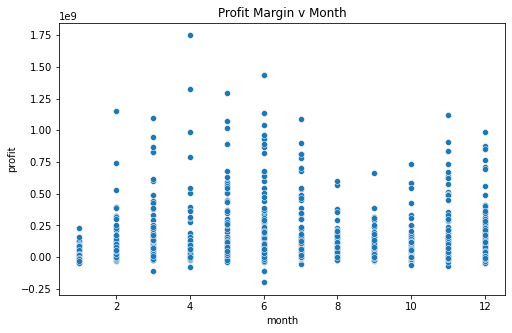

In [69]:
# Now, let's plot two variables from the iris dataset
fig, ax = plt.subplots(figsize=(8, 5))

# Use seaborn to plot two facets of the above data, colored by the target column
sns.scatterplot(y='profit', x='month', data= movies_profit)

ax.set_title('Profit Margin v Month');

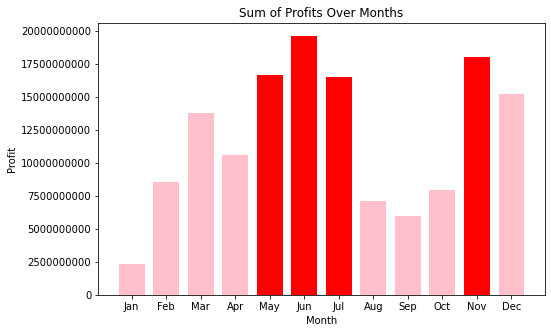

In [68]:
#this looks like total profit over month

month_profit = movies_profit.groupby(movies_profit.month)['profit'].sum()
y = month_profit.values.tolist()
x = month_profit.index.tolist()

# Now, let's plot two variables from the iris dataset
fig, ax = plt.subplots(figsize=(8, 5))
bar_chart_title = 'Sum of Profits Over Months'
bar_chart_y_label = 'Profit'
bar_chart_x_label = 'Month'

ax.bar(x=x, height= y, width=0.75, color= ('pink', 'pink', 'pink', 'pink',
                                         'red', 'red', 'red', 'pink', 'pink', 'pink',
                                         'red'), 
       tick_label=("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                 "Aug", "Sep", "Oct", "Nov", "Dec"))
       

plt.title(bar_chart_title)
ax.set_xlabel(bar_chart_x_label)
ax.set_ylabel(bar_chart_y_label)
ax.ticklabel_format(axis = 'y', style= 'plain' );




In [55]:
month_profit

month
1     2.340662e+09
2     8.553938e+09
3     1.379972e+10
4     1.061341e+10
5     1.664792e+10
6     1.961928e+10
7     1.654021e+10
8     7.109901e+09
9     5.937097e+09
10    7.973526e+09
11    1.800856e+10
12    1.519792e+10
Name: profit, dtype: float64

In [56]:
movies_profit['month'].value_counts()

10    134
9     126
11    124
12    122
3     110
6     109
8     106
7     102
5      87
4      80
2      80
1      59
Name: month, dtype: int64

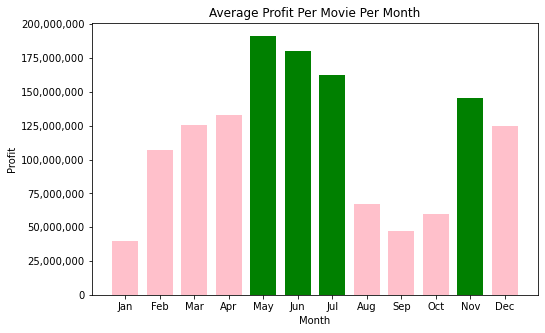

In [119]:
##maybe stack by year too
month_profit = movies_profit.groupby(movies_profit.month)['profit'].mean()
y = month_profit.values.tolist()
x = month_profit.index.tolist()
# Now, let's plot two variables from the iris dataset
bar_chart_title = 'Average Profit Per Movie Per Month'
bar_chart_y_label = 'Profit'
bar_chart_x_label = 'Month'

fig, ax = plt.subplots(figsize=(8, 5))


ax.bar(x=x, height= y, width=0.75, 
       color= ('pink', 'pink', 'pink', 'pink', 'green', 
               'green', 'green', 'pink', 'pink', 'pink','green'), 
       tick_label=("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                 "Aug", "Sep", "Oct", "Nov", "Dec"))
       #stacked =True )
       

plt.title(bar_chart_title)
ax.set_xlabel(bar_chart_x_label)
ax.set_ylabel(bar_chart_y_label);
ax.ticklabel_format(axis = 'y', style= 'plain' )
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


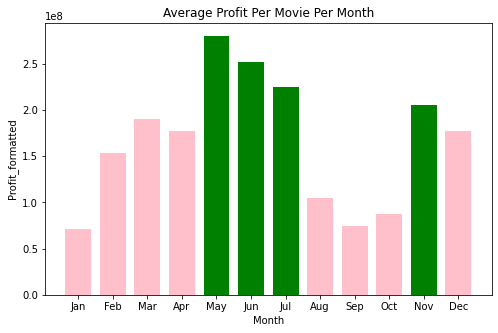

In [112]:
month_profit = movies_profit.groupby(movies_profit.month)['worldwide_gross'].mean()
y = month_profit.values.tolist()
x = month_profit.index.tolist()
# Now, let's plot two variables from the iris dataset
bar_chart_title = 'Average Profit Per Movie Per Month'
bar_chart_y_label = 'Profit_formatted'
bar_chart_x_label = 'Month'

fig, ax = plt.subplots(figsize=(8, 5))


ax.bar(x=x, height= y, width=0.75, 
       color= ('pink', 'pink', 'pink', 'pink', 'green', 
               'green', 'green', 'pink', 'pink', 'pink','green'), 
       tick_label=("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                 "Aug", "Sep", "Oct", "Nov", "Dec"))
       

plt.title(bar_chart_title)
ax.set_xlabel(bar_chart_x_label)
ax.set_ylabel(bar_chart_y_label);



No handles with labels found to put in legend.


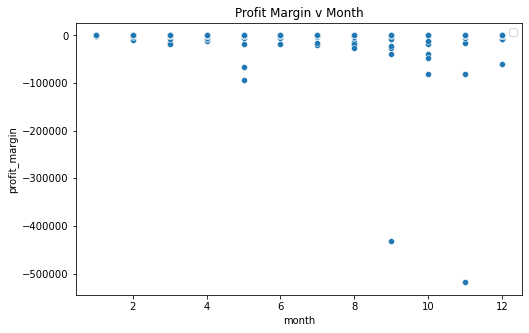

In [58]:
# Now, let's plot two variables from the iris dataset
fig, ax = plt.subplots(figsize=(8, 5))

# Use seaborn to plot two facets of the above data, colored by the target column
sns.scatterplot(y='profit_margin', x='month', data= no_low)

ax.set_title('Profit Margin v Month')
ax.legend();

<AxesSubplot:>

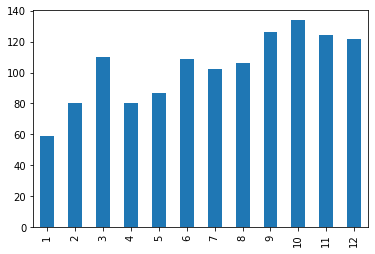

In [59]:
movies_profit['month'].value_counts(sort = False).plot(kind='bar')

<AxesSubplot:>

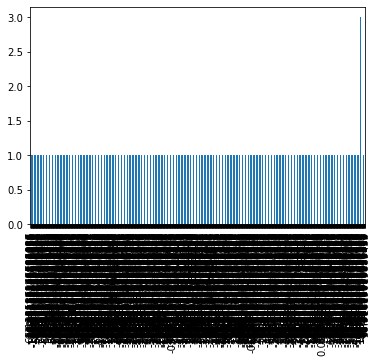

In [60]:
movies_profit['profit_margin'].value_counts(sort = False).plot(kind='bar')